## 강남구 입지특성별 매출 분포 확인, similarity 분석
### 1. 입지별 클러스터링 진행
### 2. 인구 밀도 별 클러스터링 진행
### 3. 최종 클러스터링 진행

In [104]:
# import module
import pandas as pd

## Load Data
# 깐부치킨 매장별 행정동 데이터 Load
store_dong = pd.read_csv("../resources/processedData/깐부치킨_매장좌표_행정동 추가.csv", encoding="utf8")

# 깐부치킨 거래데이터 Load
sales = pd.read_csv("../resources/processedData/깐부치킨_거래데이터.csv", encoding="utf8")

# 인구 feature Load
people = pd.read_csv("../resources/processedData/강남구 행정동별 인구 feature.csv", encoding="utf8")

# 토지 피복 비율 데이터 Load
landscape = pd.read_csv("../resources/processedData/Medium classification of land cover (divided into 3 categories).csv", encoding="utf8")

In [27]:
people

,행정동,인구수,주중평균활동인구,주말평균활동인구,일평균활동인구,유동인구비율
0,신사동,17541,38938.86,34017.55,37480.70,2.14
1,논현1동,23452,45948.54,38033.38,43603.31,1.86
2,논현2동,21960,47635.09,35376.66,44002.96,2.00
3,삼성1동,14811,48142.06,36636.06,44732.87,3.02
4,삼성2동,30291,42054.86,31835.21,39026.81,1.29
5,대치1동,25413,26184.46,25688.00,26037.36,1.02
6,대치4동,20773,34691.24,31401.05,33716.37,1.62
7,역삼1동,35878,119213.17,82748.01,108408.68,3.02
8,역삼2동,36560,53135.33,42006.91,49838.02,1.36
9,도곡1동,22670,28094.82,24927.20,27156.26,1.20


In [28]:
store_dong
dong_list = list(store_dong["행정동"].unique())
dong_list

['청담동',
 '일원1동',
 '역삼2동',
 '역삼1동',
 '신사동',
 '수서동',
 '세곡동',
 '삼성2동',
 '삼성1동',
 '대치4동',
 '대치2동',
 '대치1동',
 '논현2동',
 '논현1동',
 '개포2동']

In [35]:
## feature 뽑기
peoplefeature = pd.DataFrame(columns=["행정동","인구수","유동인구비율"])
geofeature = pd.DataFrame(columns=["행정동","문화·체육·휴양시설","상업지역","주거지역"])

for name in dong_list:
    num = people[people["행정동"]==name]["인구수"].values[0]
    ratio = people[people["행정동"]==name]["유동인구비율"].values[0]
    ls1 = landscape[landscape["행정동"] == name]["문화·체육·휴양시설"].values[0]
    ls2 = landscape[landscape["행정동"] == name]["상업지역"].values[0]
    ls3 = landscape[landscape["행정동"] == name]["주거지역"].values[0]

    peoplefeature = peoplefeature.append({"행정동":name,"인구수":num, "유동인구비율":ratio}, ignore_index=True)
    geofeature = geofeature.append({"행정동":name, "문화·체육·휴양시설": ls1, "상업지역":ls2,"주거지역": ls3},ignore_index=True)

# 유동인구 min-max normalization
# geofeature["유동인구비율(0-1)"] = (geofeature["유동인구비율"] - min(geofeature["유동인구비율"])) / (max(geofeature["유동인구비율"]) - min(geofeature["유동인구비율"]))

In [36]:
peoplefeature

,행정동,인구수,유동인구비율
0,청담동,30014,1.42
1,일원1동,16806,1.11
2,역삼2동,36560,1.36
3,역삼1동,35878,3.02
4,신사동,17541,2.14
5,수서동,16202,1.54
6,세곡동,45160,0.94
7,삼성2동,30291,1.29
8,삼성1동,14811,3.02
9,대치4동,20773,1.62


In [37]:
geofeature

,행정동,문화·체육·휴양시설,상업지역,주거지역
0,청담동,0.045404,0.521318,0.433278
1,일원1동,0.140781,0.243868,0.615351
2,역삼2동,0.031786,0.471216,0.496998
3,역삼1동,0.010595,0.611696,0.377709
4,신사동,0.083859,0.568069,0.348072
5,수서동,0.148923,0.341908,0.509169
6,세곡동,0.081850,0.282990,0.635160
7,삼성2동,0.024653,0.449894,0.525454
8,삼성1동,0.024718,0.644026,0.331256
9,대치4동,0.002936,0.511551,0.485514


In [98]:
peoplefeature["유동인구비율"].describe()
# 유동인구비율 범주 동등히 나누기
peoplefeature["cluster_peopele"] = pd.qcut(peoplefeature["유동인구비율"], q= 3, labels=[0,1,2])
# 기존 4 feature standard scaler 돌리고 k3으로 clustering 한 결과
from collections import Counter
print(Counter(peoplefeature["cluster_peopele"]))


print(peoplefeature[peoplefeature["cluster_peopele"] == 0]["행정동"].values)
print(peoplefeature[peoplefeature["cluster_peopele"] == 1]["행정동"].values)
print(peoplefeature[peoplefeature["cluster_peopele"] == 2]["행정동"].values)

Counter({1: 5, 0: 5, 2: 5})
['일원1동' '세곡동' '삼성2동' '대치1동' '개포2동']
['청담동' '역삼2동' '수서동' '대치4동' '대치2동']
['역삼1동' '신사동' '삼성1동' '논현2동' '논현1동']


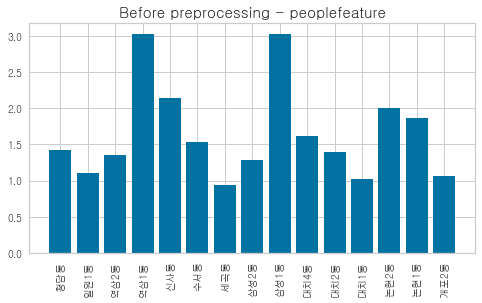

'\n# geofeature feature plot\nplt.bar(peoplefeature["행정동"], peoplefeature["유동인구비율"])\nplt.xticks(rotation=90)\nplt.title("Before preprocessing - geofeature", fontsize=15)\nplt.gcf().subplots_adjust(bottom=0.30)\nplt.show()\n# preprocessing 후 분산 확인\n#from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 \nfrom sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리 \n\ny = geofeature.iloc[:,1:].values\n\n#y = StandardScaler().fit_transform(y) # x객체에 x를 표준화한 데이터를 저장\ny = MinMaxScaler().fit_transform(y) # x객체에 x를 표준화한 데이터를 저장\ny_t_df = pd.DataFrame(y, columns=["유동인구비율","문화·체육·휴양시설","상업지역","주거지역"])\ny_t = [y_t_df["유동인구비율"].var(), y_t_df["문화·체육·휴양시설"].var(),y_t_df["상업지역"].var(),y_t_df["주거지역"].var()]\nplt.bar(x, y_t)\nplt.title("After preprocessing - peoplefeature")\nplt.show()\n'

In [77]:
# peoplefeature 분산량 확인
import matplotlib.pyplot as plt

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# people feature plot
plt.bar(peoplefeature["행정동"], peoplefeature["유동인구비율"])
plt.xticks(rotation=90)
plt.title("Before preprocessing - peoplefeature", fontsize=15)
plt.gcf().subplots_adjust(bottom=0.30)
plt.show()

"""
# geofeature feature plot
plt.bar(peoplefeature["행정동"], peoplefeature["유동인구비율"])
plt.xticks(rotation=90)
plt.title("Before preprocessing - geofeature", fontsize=15)
plt.gcf().subplots_adjust(bottom=0.30)
plt.show()
# preprocessing 후 분산 확인
#from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리 

y = geofeature.iloc[:,1:].values

#y = StandardScaler().fit_transform(y) # x객체에 x를 표준화한 데이터를 저장
y = MinMaxScaler().fit_transform(y) # x객체에 x를 표준화한 데이터를 저장
y_t_df = pd.DataFrame(y, columns=["유동인구비율","문화·체육·휴양시설","상업지역","주거지역"])
y_t = [y_t_df["유동인구비율"].var(), y_t_df["문화·체육·휴양시설"].var(),y_t_df["상업지역"].var(),y_t_df["주거지역"].var()]
plt.bar(x, y_t)
plt.title("After preprocessing - peoplefeature")
plt.show()
"""


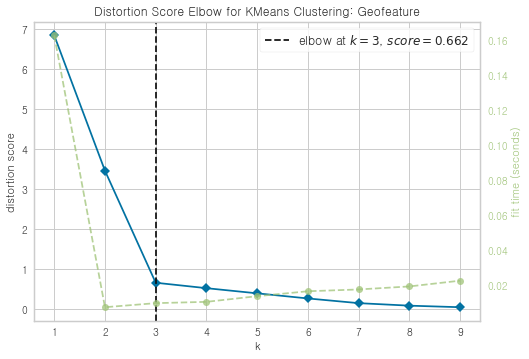

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering: Geofeature'}, xlabel='k', ylabel='distortion score'>

In [71]:
# geofeature clustering 진행
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# preprocessing 후 분산 확인
from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리  
geofeature_data = geofeature.iloc[:,1:].values

geofeature_data = MinMaxScaler().fit_transform(geofeature_data) # x객체에 x를 표준화한 데이터를 저장
#geofeature_data = StandardScaler().fit_transform(geofeature_data) # x객체에 x를 표준화한 데이터를 저장


# distortion score = Sum of squares of distances of points from cluster centers
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), title="Distortion Score Elbow for KMeans Clustering: Geofeature")
visualizer.fit(geofeature_data)
visualizer.show()

In [94]:
# 뽑힌 Feature로 clustering 진행 -  4 feature, 3 cluster
from sklearn.cluster import KMeans

k = 3

# 모델 선언
model = KMeans(n_clusters = k, random_state=10)

# 데이터에 학습
model.fit(geofeature_data)

# 결과 저장
geofeature["cluster_geo"] = model.fit_predict(geofeature_data)

In [97]:
geofeature

,행정동,문화·체육·휴양시설,상업지역,주거지역,cluster_geo
0,청담동,0.045404,0.521318,0.433278,0
1,일원1동,0.140781,0.243868,0.615351,1
2,역삼2동,0.031786,0.471216,0.496998,0
3,역삼1동,0.010595,0.611696,0.377709,2
4,신사동,0.083859,0.568069,0.348072,2
5,수서동,0.148923,0.341908,0.509169,1
6,세곡동,0.081850,0.282990,0.635160,1
7,삼성2동,0.024653,0.449894,0.525454,0
8,삼성1동,0.024718,0.644026,0.331256,2
9,대치4동,0.002936,0.511551,0.485514,0


In [74]:
# 기존 4 feature standard scaler 돌리고 k3으로 clustering 한 결과
from collections import Counter
print(Counter(geofeature["cluster v1"]))


print(geofeature[geofeature["cluster v1"] == 0]["행정동"].values)
print(geofeature[geofeature["cluster v1"] == 1]["행정동"].values)
print(geofeature[geofeature["cluster v1"] == 2]["행정동"].values)

Counter({0: 6, 1: 5, 2: 4})
['청담동' '역삼2동' '삼성2동' '대치4동' '대치2동' '논현1동']
['일원1동' '수서동' '세곡동' '대치1동' '개포2동']
['역삼1동' '신사동' '삼성1동' '논현2동']


In [99]:
feature = pd.merge(peoplefeature,geofeature, on="행정동")
feature

,행정동,인구수,유동인구비율,cluster_peopele,문화·체육·휴양시설,상업지역,주거지역,cluster_geo
0,청담동,30014,1.42,1,0.045404,0.521318,0.433278,0
1,일원1동,16806,1.11,0,0.140781,0.243868,0.615351,1
2,역삼2동,36560,1.36,1,0.031786,0.471216,0.496998,0
3,역삼1동,35878,3.02,2,0.010595,0.611696,0.377709,2
4,신사동,17541,2.14,2,0.083859,0.568069,0.348072,2
5,수서동,16202,1.54,1,0.148923,0.341908,0.509169,1
6,세곡동,45160,0.94,0,0.081850,0.282990,0.635160,1
7,삼성2동,30291,1.29,0,0.024653,0.449894,0.525454,0
8,삼성1동,14811,3.02,2,0.024718,0.644026,0.331256,2
9,대치4동,20773,1.62,1,0.002936,0.511551,0.485514,0


In [115]:
store_dong

,매장코드,매장명,도로명주소,위도,경도,행정동
0,S24088,깐부치킨(청담자이점),서울특별시 강남구 영동대로138길 9 (청담동1층 105호),37.522861,127.056465,청담동
1,T06644,(주)깐부 청담본점,서울특별시 강남구 선릉로 760 지상2층 (청담동),37.522568,127.039578,청담동
2,S56417,깐부치킨(일원점),서울특별시 강남구 일원로9길 6 1층 (일원동),37.489289,127.081985,일원1동
3,T18671,깐부치킨(역삼디오빌점),서울특별시 강남구 언주로85길 7 1층 102호 (역삼동),37.500968,127.042636,역삼2동
4,S48814,깐부치킨(강남세브란스점),서울특별시 강남구 언주로65길 13 (역삼동 삼남빌딩 지상1층 101호 102호),37.495044,127.044869,역삼2동
5,U06529,깐부치킨(역삼초교점),서울특별시 강남구 역삼로4길 16 (역삼동지상1층113호),37.492350,127.031997,역삼1동
6,S95349,깐부치킨(역삼GS타워점),서울특별시 강남구 논현로94길 15 지상1층 (역삼동),37.502631,127.037547,역삼1동
7,T53532,깐부치킨 역삼본점,서울특별시 강남구 논현로85길 37 지상1층 (역삼동),37.498137,127.035094,역삼1동
8,S24004,깐부치킨(역삼럭키점),서울특별시 강남구 논현로63길 25 (역삼동),37.492247,127.038872,역삼1동
9,S37219,깐부치킨(강남역플래티넘점),서울특별시 강남구 강남대로78길 14 (역삼동),37.494866,127.030536,역삼1동


In [109]:
sales

,매장코드,매장명,영업일자,영수증번호,결제일시,테이블번호,총판매금액,소분류명,상품명,상품코드,판매수량,판매단가
0,S23991,깐부치킨(강남구청역1번출구점),20190202,6,20190202190027,포장1,2000,SIDE MENU,코울슬러,48,1,2000
1,S23991,깐부치킨(강남구청역1번출구점),20190204,14,20190204201731,포장1,19000,SIDE MENU,골뱅이,8,1,19000
2,S23991,깐부치킨(강남구청역1번출구점),20190201,2,20190201175536,포장1,19000,SIDE MENU,골뱅이,8,1,19000
3,S23991,깐부치킨(강남구청역1번출구점),20190201,7,20190201192707,포장1,11000,SIDE MENU,웨지포테이토,12,1,11000
4,S23991,깐부치킨(강남구청역1번출구점),20190203,1,20190203174823,포장1,19000,MAIN MENU,마늘간장,3496,1,19000
...,...,...,...,...,...,...,...,...,...,...,...,...
83572,U06529,깐부치킨(역삼초교점),20190228,22,20190301013814,1,19000,SIDE MENU,골뱅이,8,1,19000
83573,U06529,깐부치킨(역삼초교점),20190228,22,20190301013814,1,500,EXTRA MENU,소스추가,492,1,500
83574,U06529,깐부치킨(역삼초교점),20190226,10,20190227025816,1,500,EXTRA MENU,소스추가,492,1,500
83575,U06529,깐부치킨(역삼초교점),20190228,22,20190301013814,1,500,EXTRA MENU,포장무,101,1,500


In [129]:
# 깐부치킨 매출/거주인구와 feature 합치기
store = store_dong.iloc[:,[0,1,5]]
gganbu = pd.DataFrame(columns=["매장코드","매장명","행정동","인구대비매출","peopleFeature","geoFeature"])
for s in list(store_dong["매장코드"]):
    dong = store_dong[store_dong["매장코드"] == s]["행정동"].values[0]
    name = store_dong[store_dong["매장코드"] == s]["매장명"].values[0]
    sale = sum(sales[sales["매장코드"]==s]["총판매금액"])
    people = feature[feature["행정동"]==dong]["인구수"].values[0]
    sperp = round(sale/people, 2)
    peoplefea = str(feature[feature["행정동"]==dong]["cluster_peopele"].values[0])
    geofea = str(feature[feature["행정동"]==dong]["cluster_geo"].values[0])
    gganbu = gganbu.append({"매장코드":s, "매장명":name, "행정동":dong, "인구대비매출": sperp, "peopleFeature":peoplefea, "geoFeature": geofea},ignore_index=True)

gganbu["Full Featuere"] = gganbu["peopleFeature"].map(str) + gganbu["geoFeature"]
gganbu

,매장코드,매장명,행정동,인구대비매출,peopleFeature,geoFeature,Full Featuere
0,S24088,깐부치킨(청담자이점),청담동,1575.61,1,0,10
1,T06644,(주)깐부 청담본점,청담동,2662.96,1,0,10
2,S56417,깐부치킨(일원점),일원1동,1868.51,0,1,01
3,T18671,깐부치킨(역삼디오빌점),역삼2동,1002.23,1,0,10
4,S48814,깐부치킨(강남세브란스점),역삼2동,402.69,1,0,10
5,U06529,깐부치킨(역삼초교점),역삼1동,399.28,2,2,22
6,S95349,깐부치킨(역삼GS타워점),역삼1동,1402.82,2,2,22
7,T53532,깐부치킨 역삼본점,역삼1동,1130.04,2,2,22
8,S24004,깐부치킨(역삼럭키점),역삼1동,422.32,2,2,22
9,S37219,깐부치킨(강남역플래티넘점),역삼1동,1544.07,2,2,22


In [130]:
print(Counter(gganbu["Full Featuere"]))

Counter({'22': 15, '10': 9, '01': 4, '11': 2, '00': 2, '20': 1})
